#  *Data Analysis: IUMTWEB Project*

We will proceed to analyze each table of the Project, performing the following operations for each:
- __Visualization__ of the table and its data
- necessary, __replacement__ or __elimination__ of *null* or useless data for data analysis purposes
- __Visualization__ of various types of charts

# *Analysis 1: Competitions*
__We begin__ the analysis with the __Competitions__ table.
The table provides __information__ on various __football leagues and cups__ organized in different European countries and international competitions.
Each __row__ represents a __specific competition__ and includes various __details__.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../')

# Table Visualization
We begin by __reading__ the __csv__ file and displaying the first __5 rows__.

In [4]:
df= pd.read_csv('../Dataset/competitions.csv')

df.head()

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...


We then __understand__ what each __column__ in the Competitions table __represents__:
- __competition_id__: __Unique code__ for the __competition__.
- __competition_code__: __Code__ or short name of the __competition__.
- __name__: __Full name__ of the __competition__.
- __sub_type__: Specific __category__ of the __competition__ (e.g., domestic_cup, domestic_super_cup).
- __type__: General __type__ of the __competition__ (e.g., domestic_cup, international_cup).
- __country_id__: __ID__ of the __country__ where the competition takes place.
- __country_name__: __Name__ of the __country__ where the competition takes place.
- __domestic_league_code__: Code of the main __domestic league__ associated with the competition.
- __confederation__: Football confederation to which it belongs (e.g., Europe).
- __url__: Link to the competition's page on __Transfermarkt__ for more details.

In [5]:
print('Rows and Colums number:', df.shape)

Rows and Colums number: (43, 10)


*__Size__*:
We notice that the table __does not have many rows__, and therefore stores static information (not frequently updated).

## Checking for Null Data and Managing It
We check if there are any __null__ values in the dataset and, based on that, decide how to proceed.

In [6]:
df.isnull().sum()

competition_id          0
competition_code        0
name                    0
sub_type                0
type                    0
country_id              0
country_name            7
domestic_league_code    7
confederation           0
url                     0
dtype: int64

We notice that in the __country_name__ and __domestic_league_code__ columns, there are 7 rows with __null__ values.
We proceed to __replace__ these values with __'Unknown'__ to make the data more __understandable__ and __consistent__, excluding the possibility of removing those rows.

In [7]:
df['country_name']=df['country_name'].fillna('Unknown')
df['domestic_league_code']=df['domestic_league_code'].fillna('Unknown')

We check the content of the __url__ column to understand if it could be __useful__ for the analysis.

In [8]:
df['url']

0     https://www.transfermarkt.co.uk/italy-cup/star...
1     https://www.transfermarkt.co.uk/johan-cruijff-...
2     https://www.transfermarkt.co.uk/kypello-ellada...
3     https://www.transfermarkt.co.uk/supertaca-cand...
4     https://www.transfermarkt.co.uk/russian-super-...
5     https://www.transfermarkt.co.uk/supercopa/star...
6     https://www.transfermarkt.co.uk/uefa-super-cup...
7     https://www.transfermarkt.co.uk/superligaen/st...
8     https://www.transfermarkt.co.uk/europa-league/...
9     https://www.transfermarkt.co.uk/laliga/startse...
10    https://www.transfermarkt.co.uk/ligue-1/starts...
11    https://www.transfermarkt.co.uk/serie-a/starts...
12    https://www.transfermarkt.co.uk/eredivisie/sta...
13    https://www.transfermarkt.co.uk/russian-cup/st...
14    https://www.transfermarkt.co.uk/liga-portugal-...
15    https://www.transfermarkt.co.uk/belgian-superc...
16    https://www.transfermarkt.co.uk/premier-league...
17    https://www.transfermarkt.co.uk/europa-lea

The __url__ column contains links to __Transfermarkt__ pages related to the competitions.
Since they are not __necessary__ for the analysis, we can __remove__ the column from the table.

In [9]:
df = df.drop('url', axis=1)

We then verify that the __removal__ was __successful__.
By looking at the first 5 rows and checking the number of columns, we can __confirm__ that the __url__ column has been __successfully removed__.

In [10]:
df.head()

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa


In [11]:
print('Rows and Colums numbers after dropping URL column:', df.shape)

Rows and Colums numbers after dropping URL column: (43, 9)


A __horizontal bar__ chart is generated showing the __distribution__ of the __types of competitions__. The __count__ of each type of competition is calculated.

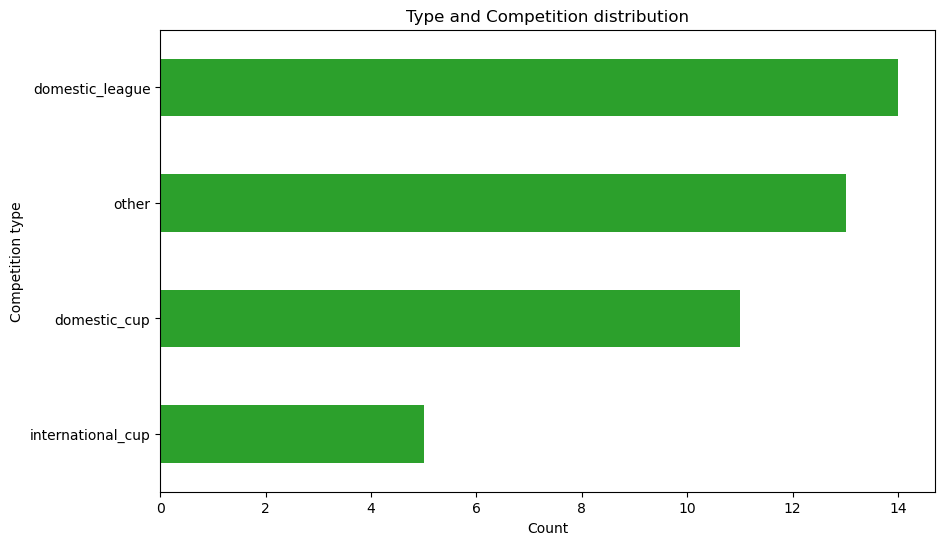

In [12]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(10, 6))
type_counts.plot(kind='barh', color='C2')
plt.title('Type and Competition distribution')
plt.xlabel('Count')
plt.ylabel('Competition type')
plt.gca().invert_yaxis()  
plt.show()

The __pie__ chart below shows the __distribution__ of the __countries__ where the competitions take place. Here are the main steps to create the chart:
- Calculate the __count__ of __competitions__ per country, __excluding__ the __'Unknown'__ values handled earlier
- Group the countries based on the __number__ of competitions
- Create a __color mapping__ to assign a color to each count group
- Create the __pie__ chart with customized colors
- Create a __legend__ with colors associated with the countries

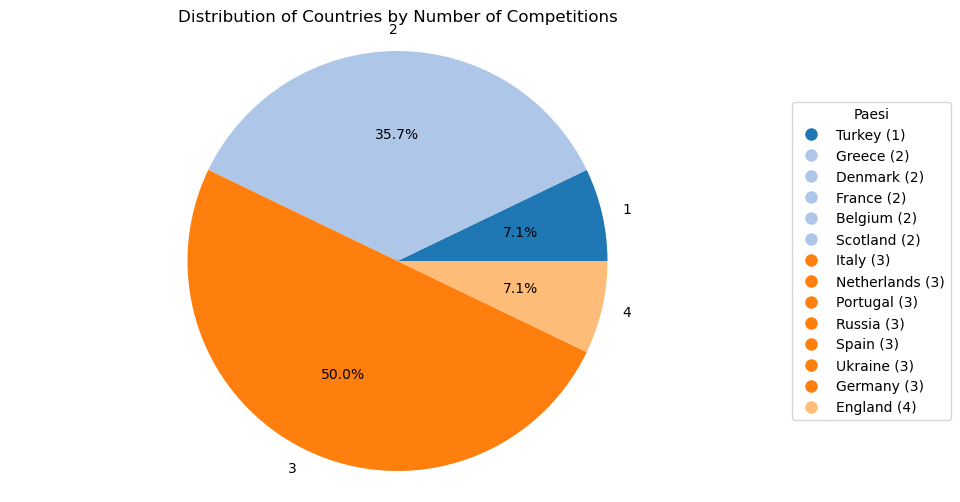

In [13]:
from Utils.CompetitionUtils import plot_country_distribution

country_counts = df[df['country_name'] != 'Unknown']['country_name'].value_counts()
grouped_counts = country_counts.value_counts().sort_index()
colors = plt.cm.tab20.colors
color_mapping = {count: colors[i % len(colors)] for i, count in enumerate(grouped_counts.index)}

plot_country_distribution(grouped_counts, country_counts, color_mapping)

The GeoPandas library is used for the next chart.
The chart shows the __distribution__ of __competitions__ per country in __Europe__.
Here are the main steps to create the chart:
- Load the __world__ map
- Filter the world DataFrame to include only __Europe__
- Rename the column in the country count DataFrame
- Merge the world map with the country count DataFrame
- Create the chart

The bar on the right shows the __legend__ with the __colors__ associated with the number of competitions per country.

C:\Users\aless\Desktop\progetti\DataAnalysis\Notebooks\..\Utils\CompetitionUtils.py:70: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


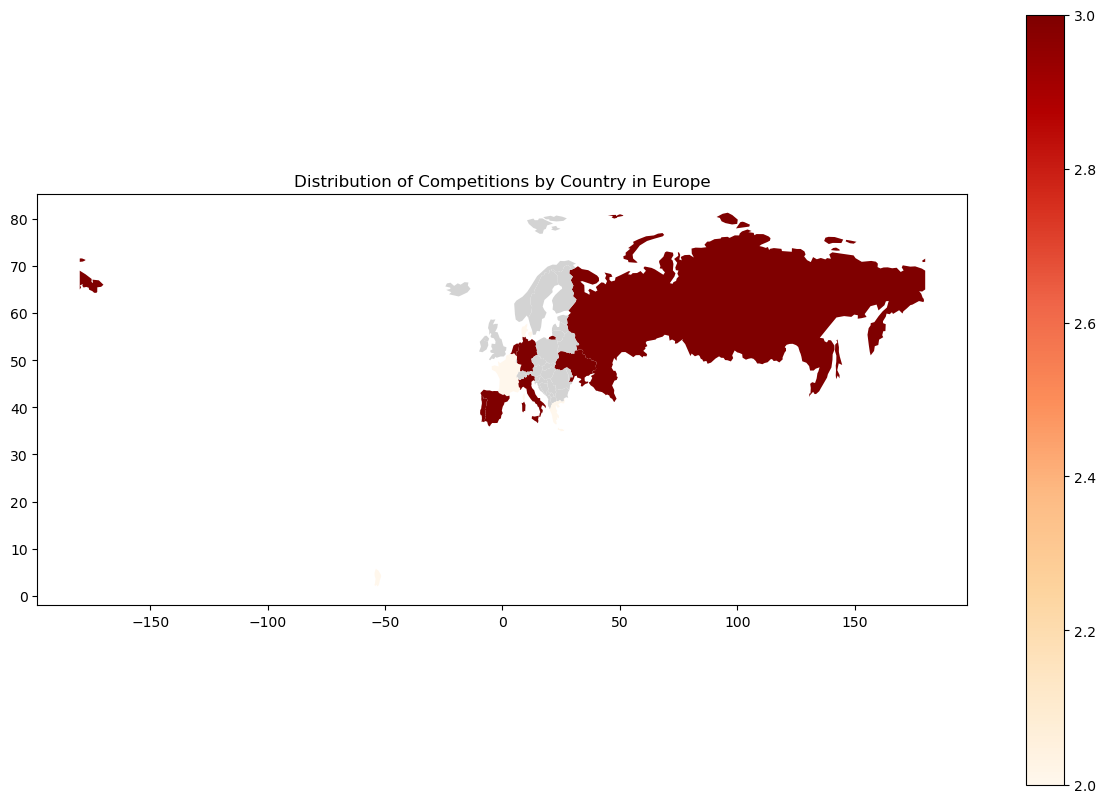

In [14]:
from Utils.CompetitionUtils import load_europe_map, plot_competition_distribution

europe = load_europe_map()
plot_competition_distribution(europe, country_counts)

In the next vertical bar chart, the __distribution__ of __sub_types__ by __type of competition__ is shown. Specifically, the chart displays the __count__ of each sub_type for every type of competition. It can be observed that first_tier is the most common sub_type.

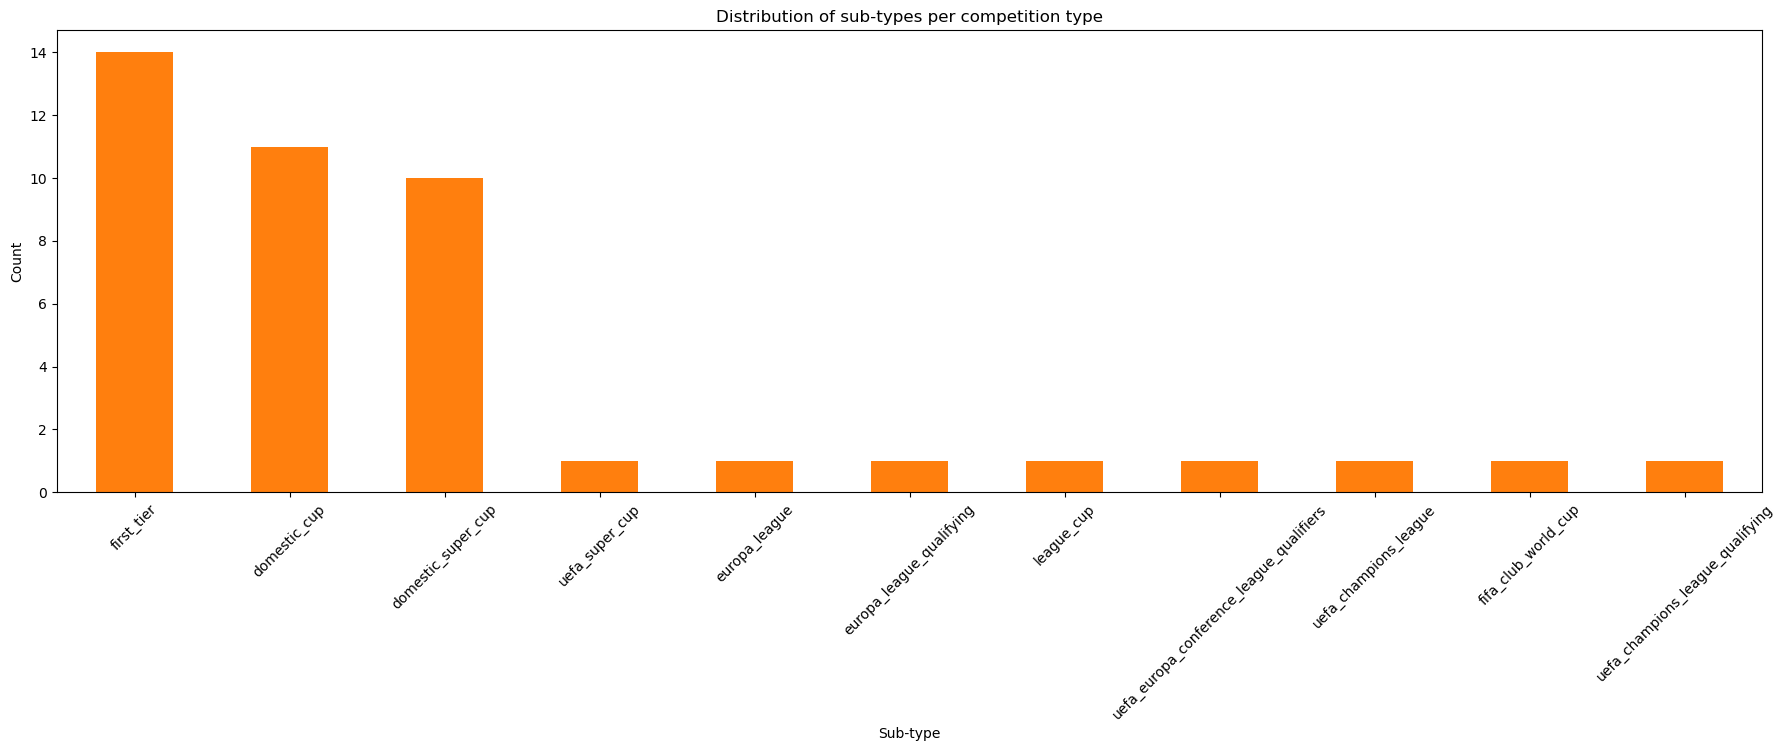

In [15]:
sub_type_counts = df['sub_type'].value_counts()

plt.figure(figsize=(22, 6))

sub_type_counts.plot(kind='bar', color='C1')
plt.title('Distribution of sub-types per competition type')
plt.xlabel('Sub-type')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.show()